<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [4]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


Sample unique Industry values: ['Healthcare' 'Software Development' 'Banking/Financial Services' 'Other:'
 'Media & Advertising Services' 'Insurance'
 'Internet, Telecomm or Information Services' 'Higher Education' 'Energy'
 'Fintech']

Top industries:
 Industry
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Name: count, dtype: int64


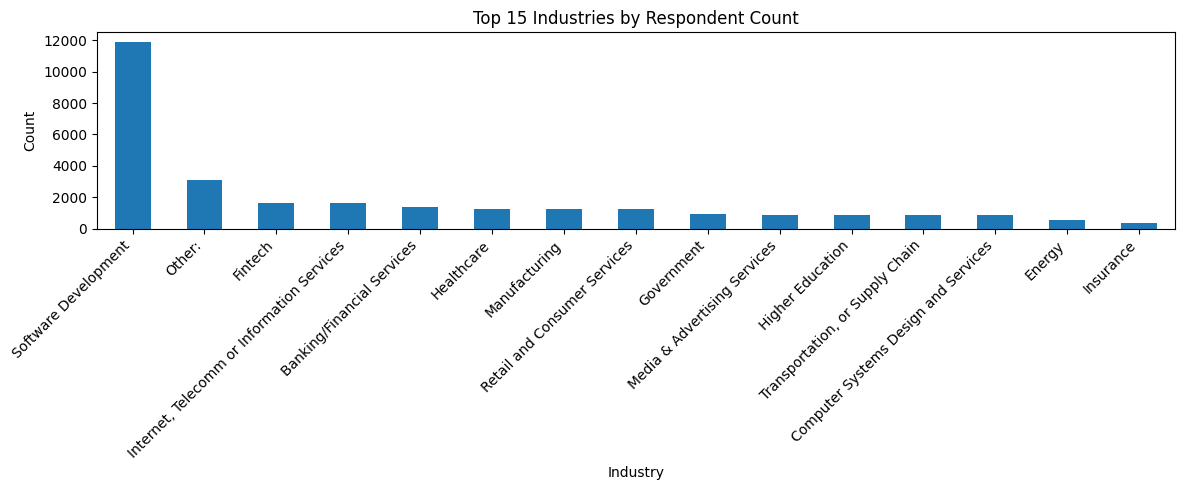

In [5]:
# Step 2: distribution of Industry
import matplotlib.pyplot as plt

print("Sample unique Industry values:", df['Industry'].dropna().unique()[:10])
industry_counts = df['Industry'].value_counts(dropna=True)
print("\nTop industries:\n", industry_counts.head(10))

plt.figure(figsize=(12,5))
industry_counts.head(15).plot(kind='bar')
plt.title('Top 15 Industries by Respondent Count')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [6]:
# Step 3: identify high compensation outliers
import numpy as np, pandas as pd

# Make sure compensation is numeric
df['ConvertedCompYearly_num'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

comp = df['ConvertedCompYearly_num'].dropna()
mean_comp = comp.mean()
median_comp = comp.median()
std_comp = comp.std()

print(f"mean={mean_comp:.2f}, median={median_comp:.2f}, std={std_comp:.2f}")
threshold_high = mean_comp + 3*std_comp
print(f"High threshold (mean + 3*std) = {threshold_high:.2f}")

high_outliers = df[df['ConvertedCompYearly_num'] > threshold_high]
print("Count of high-outliers:", len(high_outliers))
display(high_outliers.sort_values('ConvertedCompYearly_num', ascending=False).head(10)[['ConvertedCompYearly', 'ConvertedCompYearly_num']])


mean=86155.29, median=65000.00, std=186756.97
High threshold (mean + 3*std) = 646426.21
Count of high-outliers: 89


,ConvertedCompYearly,ConvertedCompYearly_num
15837,16256603.0,16256603.0
12723,13818022.0,13818022.0
28379,9000000.0,9000000.0
17593,6340564.0,6340564.0
17672,4936778.0,4936778.0
19267,3367716.0,3367716.0
23694,2584118.0,2584118.0
33720,2237846.0,2237846.0
34523,2153432.0,2153432.0
13763,2048046.0,2048046.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1=32712.00, Q3=107971.50, IQR=75259.50
Lower bound = -80177.25, Upper bound = 220860.75
IQR outliers count: 978


,ConvertedCompYearly,ConvertedCompYearly_num
15837,16256603.0,16256603.0
12723,13818022.0,13818022.0
28379,9000000.0,9000000.0
17593,6340564.0,6340564.0
17672,4936778.0,4936778.0
19267,3367716.0,3367716.0
23694,2584118.0,2584118.0
33720,2237846.0,2237846.0
34523,2153432.0,2153432.0
13763,2048046.0,2048046.0


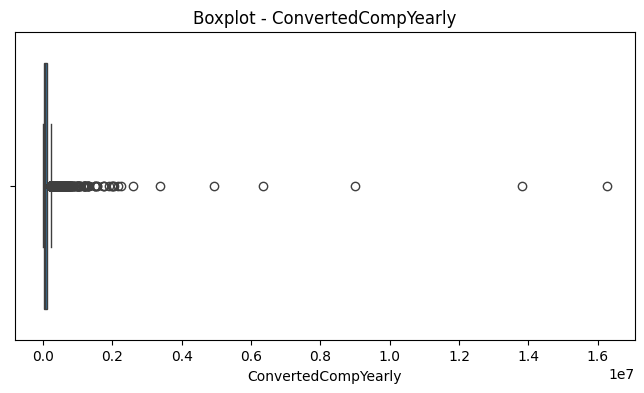

In [7]:
# Step 4: IQR outlier detection + boxplot
q1 = comp.quantile(0.25)
q3 = comp.quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

print(f"Q1={q1:.2f}, Q3={q3:.2f}, IQR={iqr:.2f}")
print(f"Lower bound = {lower:.2f}, Upper bound = {upper:.2f}")

outliers_iqr = df[(df['ConvertedCompYearly_num'] < lower) | (df['ConvertedCompYearly_num'] > upper)]
print("IQR outliers count:", len(outliers_iqr))
display(outliers_iqr.sort_values('ConvertedCompYearly_num', ascending=False).head(10)[['ConvertedCompYearly', 'ConvertedCompYearly_num']])

# Boxplot
import seaborn as sns
plt.figure(figsize=(8,4))
sns.boxplot(x=df['ConvertedCompYearly_num'].dropna())
plt.title('Boxplot - ConvertedCompYearly')
plt.xlabel('ConvertedCompYearly')
plt.show()


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


Original rows: 65437 | After removal: 64459


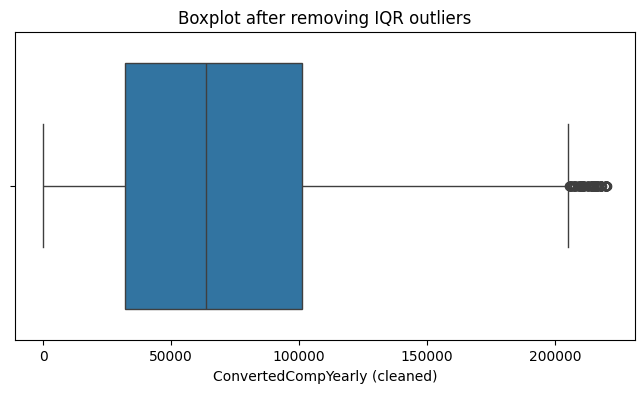

In [8]:
# Step 5: remove outliers using IQR bounds and create new DataFrame
df_no_outliers = df[(df['ConvertedCompYearly_num'].between(lower, upper)) | (df['ConvertedCompYearly_num'].isna())].copy()
print(f"Original rows: {df.shape[0]} | After removal: {df_no_outliers.shape[0]}")

# Quick verification boxplot for the cleaned DF
plt.figure(figsize=(8,4))
sns.boxplot(x=df_no_outliers['ConvertedCompYearly_num'].dropna())
plt.title('Boxplot after removing IQR outliers')
plt.xlabel('ConvertedCompYearly (cleaned)')
plt.show()


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


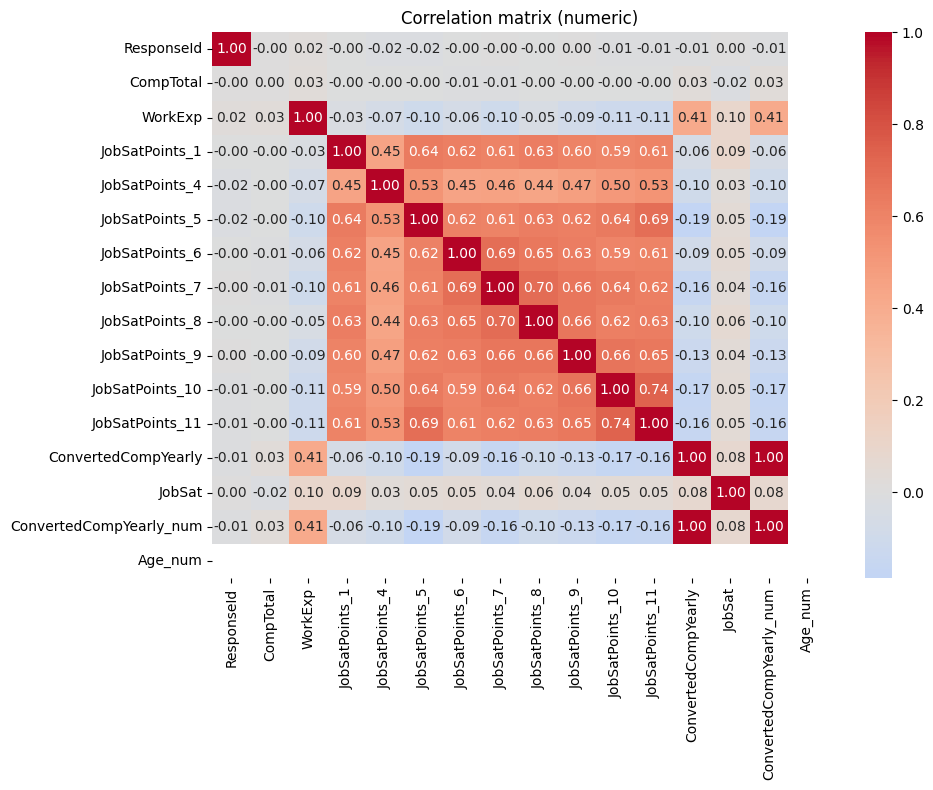

Pearson corr (Age, ConvertedCompYearly) = nan


In [9]:
# Step 6: correlation analysis between age and numeric fields (use df_no_outliers)
import numpy as np

# Map common bucket labels to midpoints (adjust keys if your labels differ)
age_map = {
    'Under 18': 16, '18-24': 21, '25-34': 29.5, '35-44': 39.5,
    '45-54': 49.5, '55-64': 59.5, '65 or older': 67.5, '65+': 67.5
}
df_no_outliers['Age_num'] = df_no_outliers['Age'].map(age_map)

# Fallback parser for other formats (e.g., "30-34" or numeric strings)
def parse_age(x):
    if pd.isna(x): return np.nan
    if isinstance(x, (int, float)): return x
    s = str(x).strip()
    if '-' in s:
        parts = s.split('-')
        try:
            return (float(parts[0]) + float(parts[1]))/2
        except:
            return np.nan
    try:
        return float(s)
    except:
        return np.nan

df_no_outliers['Age_num'] = df_no_outliers['Age_num'].fillna(df_no_outliers['Age'].apply(parse_age))

numeric_cols = df_no_outliers.select_dtypes(include=[np.number]).columns.tolist()
for col in ['ConvertedCompYearly_num', 'Age_num']:
    if col not in numeric_cols:
        numeric_cols.append(col)

corr_mat = df_no_outliers[numeric_cols].corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation matrix (numeric)')
plt.tight_layout()
plt.show()

if 'Age_num' in corr_mat.index and 'ConvertedCompYearly_num' in corr_mat.columns:
    print("Pearson corr (Age, ConvertedCompYearly) =", corr_mat.loc['Age_num','ConvertedCompYearly_num'])
else:
    print("Age or ConvertedCompYearly not present as numeric columns for correlation.")


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
